Try plotting covid data over time and analyzing some trends by neighborhood

Downloaded covid data from here: https://open.toronto.ca/dataset/covid-19-cases-in-toronto/


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
sns.set(font_scale=1.5)

# 1. Load your data
path0 = r'C:\Users\Ksenia\OneDrive\Desktop'
file_name1 = 'COVID19 cases.csv'
file_path = os.path.join(path0, file_name1)

# Check if the file exists
if os.path.exists(file_path):
    # Read the CSV file using pandas
    covid_counts = pd.read_csv(file_path,  quotechar='"', encoding='utf-8')
else:
    print(f"File '{file_name}' not found in the specified directory.")

covid_counts

_id  Assigned_ID Outbreak Associated       Age Group  \
0            1            1                  NO  50 to 59 Years   
1            2            2                  NO  50 to 59 Years   
2            3            3                  NO  20 to 29 Years   
3            4            4                  NO  60 to 69 Years   
4            5            5                  NO  60 to 69 Years   
...        ...          ...                 ...             ...   
413469  413470       425308             UNKNOWN  60 to 69 Years   
413470  413471       425309             UNKNOWN  80 to 89 Years   
413471  413472       425310             UNKNOWN  80 to 89 Years   
413472  413473       425311             UNKNOWN  70 to 79 Years   
413473  413474       425312             UNKNOWN  19 and younger   

                       Neighbourhood Name Postal Code Source of Infection  \
0                         Willowdale East         M2N              Travel   
1                         Willowdale East         M2N              Travel   
2                       Parkwoods-Donalda         M3A              Travel   
3                   Church-Yonge Corridor         M4W              Travel   
4                   Church-Yonge Corridor         M4W              Travel   
...                                   ...         ...                 ...   
413469                       Kennedy Park         M1K      No Information   
413470                Mount Pleasant East         M4S      No Information   
413471         Islington-City Centre West         M9B      No Information   
413472                 Danforth-East York         M4J      No Information   
413473  Waterfront Communities-The Island         M5A      No Information   

       Classification Episode Date Reported Date Client Gender   Outcome  \
0           CONFIRMED    1/22/2020     1/23/2020        FEMALE  RESOLVED   
1           CONFIRMED    1/21/2020     1/23/2020          MALE  RESOLVED   
2           CONFIRMED     2/5/2020     2/21/2020        FEMALE  RESOLVED   
3           CONFIRMED    2/16/2020     2/25/2020        FEMALE  RESOLVED   
4           CONFIRMED    2/20/2020     2/26/2020          MALE  RESOLVED   
...               ...          ...           ...           ...       ...   
413469      CONFIRMED    1/15/2024     1/16/2024          MALE    ACTIVE   
413470      CONFIRMED    1/15/2024     1/16/2024        FEMALE    ACTIVE   
413471      CONFIRMED    1/15/2024     1/16/2024        FEMALE    ACTIVE   
413472      CONFIRMED    1/15/2024     1/16/2024          MALE    ACTIVE   
413473      CONFIRMED    1/15/2024     1/16/2024          MALE    ACTIVE   

       Ever Hospitalized Ever in ICU Ever Intubated  
0                     No          No             No  
1                    Yes          No             No  
2                     No          No             No  
3                     No          No             No  
4                     No          No             No  
...                  ...         ...            ...  
413469                No          No             No  
413470                No          No             No  
413471                No          No             No  
413472                No          No             No  
413473                No          No             No  

[413474 rows x 15 columns]

Plot histogram of cases over time

In [2]:
# Convert 'Reported Date' to datetime format
covid_counts['Reported Date'] = pd.to_datetime(covid_counts['Reported Date'])

# Group by 'Reported Date' and 'Outcome', count the cases, and unstack the result
outcome_counts = covid_counts.groupby(['Reported Date', 'Outcome']).size().unstack(fill_value=0) #fills missing values with zeros

outcome_counts

#max_value = outcome_counts.max().max()
#min_value = outcome_counts.min().min()
#print(f"Max: {max_value}")
#print(f"Min: {min_value}")

Outcome        ACTIVE  FATAL  RESOLVED
Reported Date                         
2020-01-23          0      0         2
2020-02-04          0      0         1
2020-02-21          0      0         1
2020-02-25          0      0         1
2020-02-26          0      0         1
...               ...    ...       ...
2024-01-12         85      0         0
2024-01-13         71      0         0
2024-01-14         60      0         0
2024-01-15         57      0         0
2024-01-16         14      0         0

[1425 rows x 3 columns]

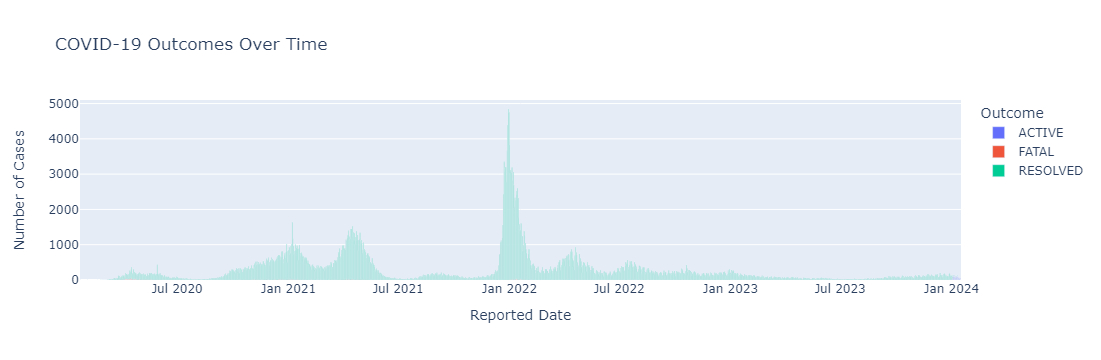

In [3]:
#use plotly to create an interactive graph based on outcome:

import plotly.express as px

# reset the index to use Reported Date as a regular column
outcome_counts_reset = outcome_counts.reset_index()

# melt the dataframe
outcome_counts_melted = pd.melt(outcome_counts_reset, id_vars=['Reported Date'], value_vars=['ACTIVE', 'FATAL', 'RESOLVED'],
                               var_name='Outcome', value_name='Number of Cases')

# plot
fig = px.bar(outcome_counts_melted, x='Reported Date', y='Number of Cases', color='Outcome',
             title='COVID-19 Outcomes Over Time', labels={'Number of Cases': 'Number of Cases'})
fig.show()

In [4]:
cord_df=pd.read_csv('http://cocl.us/Geospatial_data')
cord_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [5]:
cord_merged = pd.merge(cord_df, covid_counts, on='Postal Code') #merge the datasets 
cord_merged

Postal Code   Latitude  Longitude     _id  Assigned_ID  \
0              M1B  43.806686 -79.194353      22           23   
1              M1B  43.806686 -79.194353     233          246   
2              M1B  43.806686 -79.194353     284          302   
3              M1B  43.806686 -79.194353     305          323   
4              M1B  43.806686 -79.194353     321          339   
...            ...        ...        ...     ...          ...   
404879         M9W  43.706748 -79.594054  412726       424564   
404880         M9W  43.706748 -79.594054  412814       424652   
404881         M9W  43.706748 -79.594054  412923       424761   
404882         M9W  43.706748 -79.594054  413388       425226   
404883         M9W  43.706748 -79.594054  413412       425250   

       Outbreak Associated       Age Group      Neighbourhood Name  \
0                       NO  60 to 69 Years                 Malvern   
1                      YES  60 to 69 Years                 Malvern   
2                       NO  50 to 59 Years                 Malvern   
3                       NO  30 to 39 Years                   Rouge   
4                      YES  30 to 39 Years                   Rouge   
...                    ...             ...                     ...   
404879             UNKNOWN  60 to 69 Years  West Humber-Clairville   
404880             UNKNOWN  40 to 49 Years         Rexdale-Kipling   
404881                 YES    90 and older         Rexdale-Kipling   
404882             UNKNOWN  19 and younger  West Humber-Clairville   
404883             UNKNOWN  30 to 39 Years         Rexdale-Kipling   

                       Source of Infection Classification Episode Date  \
0                                   Travel      CONFIRMED     3/4/2020   
1       Outbreaks, Healthcare Institutions      CONFIRMED    3/16/2020   
2                            Close Contact      CONFIRMED    3/17/2020   
3                                Community      CONFIRMED    3/17/2020   
4       Outbreaks, Healthcare Institutions      CONFIRMED    3/17/2020   
...                                    ...            ...          ...   
404879                      No Information      CONFIRMED     1/7/2024   
404880                      No Information      CONFIRMED     1/6/2024   
404881  Outbreaks, Healthcare Institutions      CONFIRMED     1/8/2024   
404882                      No Information      CONFIRMED    1/14/2024   
404883                      No Information      CONFIRMED    1/12/2024   

       Reported Date Client Gender   Outcome Ever Hospitalized Ever in ICU  \
0         2020-03-08        FEMALE  RESOLVED               Yes         Yes   
1         2020-03-20        FEMALE  RESOLVED                No          No   
2         2020-03-22        FEMALE  RESOLVED                No          No   
3         2020-03-23          MALE  RESOLVED                No          No   
4         2020-03-23        FEMALE  RESOLVED                No          No   
...              ...           ...       ...               ...         ...   
404879    2024-01-07        FEMALE    ACTIVE               Yes          No   
404880    2024-01-08        FEMALE    ACTIVE                No          No   
404881    2024-01-09        FEMALE    ACTIVE                No          No   
404882    2024-01-14          MALE    ACTIVE                No          No   
404883    2024-01-15        FEMALE    ACTIVE                No          No   

       Ever Intubated  
0                 Yes  
1                  No  
2                  No  
3                  No  
4                  No  
...               ...  
404879             No  
404880             No  
404881             No  
404882             No  
404883             No  

[404884 rows x 17 columns]

In [6]:
# doublecheck the dataframe to make sure we have all the dates
cord_merged = cord_merged.sort_values(by='Reported Date', ascending=True)
cord_merged

Postal Code   Latitude  Longitude     _id  Assigned_ID  \
113463         M2N  43.770120 -79.408493       1            1   
113464         M2N  43.770120 -79.408493       2            2   
108244         M2L  43.757490 -79.374714  117562       122318   
128492         M3A  43.753259 -79.329656       3            3   
220581         M4W  43.679563 -79.377529       4            4   
...            ...        ...        ...     ...          ...   
222261         M4W  43.679563 -79.377529  413467       425305   
217419         M4S  43.704324 -79.388790  413471       425309   
285582         M6E  43.689026 -79.453512  413465       425303   
295363         M6H  43.669005 -79.442259  413461       425299   
200892         M4K  43.679557 -79.352188  413469       425307   

       Outbreak Associated       Age Group      Neighbourhood Name  \
113463                  NO  50 to 59 Years         Willowdale East   
113464                  NO  50 to 59 Years         Willowdale East   
108244                  NO  19 and younger    St.Andrew-Windfields   
128492                  NO  20 to 29 Years       Parkwoods-Donalda   
220581                  NO  60 to 69 Years   Church-Yonge Corridor   
...                    ...             ...                     ...   
222261             UNKNOWN  80 to 89 Years     Rosedale-Moore Park   
217419             UNKNOWN  80 to 89 Years     Mount Pleasant East   
285582             UNKNOWN  70 to 79 Years  Briar Hill - Belgravia   
295363             UNKNOWN  40 to 49 Years  Corso Italia-Davenport   
200892             UNKNOWN  19 and younger         North Riverdale   

       Source of Infection Classification Episode Date Reported Date  \
113463              Travel      CONFIRMED    1/22/2020    2020-01-23   
113464              Travel      CONFIRMED    1/21/2020    2020-01-23   
108244           Community       PROBABLE     2/1/2020    2020-02-04   
128492              Travel      CONFIRMED     2/5/2020    2020-02-21   
220581              Travel      CONFIRMED    2/16/2020    2020-02-25   
...                    ...            ...          ...           ...   
222261      No Information      CONFIRMED    1/15/2024    2024-01-16   
217419      No Information      CONFIRMED    1/15/2024    2024-01-16   
285582      No Information      CONFIRMED    1/15/2024    2024-01-16   
295363      No Information      CONFIRMED    1/15/2024    2024-01-16   
200892      No Information      CONFIRMED    1/15/2024    2024-01-16   

       Client Gender   Outcome Ever Hospitalized Ever in ICU Ever Intubated  
113463        FEMALE  RESOLVED                No          No             No  
113464          MALE  RESOLVED               Yes          No             No  
108244          MALE  RESOLVED                No          No             No  
128492        FEMALE  RESOLVED                No          No             No  
220581        FEMALE  RESOLVED                No          No             No  
...              ...       ...               ...         ...            ...  
222261        FEMALE    ACTIVE                No          No             No  
217419        FEMALE    ACTIVE                No          No             No  
285582          MALE    ACTIVE                No          No             No  
295363        FEMALE    ACTIVE                No          No             No  
200892        FEMALE    ACTIVE                No          No             No  

[404884 rows x 17 columns]

In [7]:
cord_merged['MonthYear'] = cord_merged['Reported Date'].dt.to_period('M')
# group by 'MonthYear' and sum the cases
total_outcome = cord_merged.groupby(['MonthYear', 'Outcome']).size().reset_index(name='Total Cases')
print(total_outcome) #ok data seems good

    MonthYear   Outcome  Total Cases
0     2020-01  RESOLVED            2
1     2020-02  RESOLVED            7
2     2020-03     FATAL           50
3     2020-03  RESOLVED          911
4     2020-04     FATAL          796
..        ...       ...          ...
108   2023-12     FATAL            7
109   2023-12  RESOLVED         3596
110   2024-01    ACTIVE         1219
111   2024-01     FATAL            2
112   2024-01  RESOLVED          196

[113 rows x 3 columns]


Let's plot cases by lat/long coordinates like before: 

<xarray.DataArray (Latitude_jittered: 600, Longitude_jittered: 800)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * Longitude_jittered  (Longitude_jittered) float64 -79.64 -79.64 ... -79.13
  * Latitude_jittered   (Latitude_jittered) float64 43.56 43.56 ... 43.86 43.86
Attributes:
    x_range:  (-79.6401359575512, -79.1332141866798)
    y_range:  (43.560568777088555, 43.86193594688086)


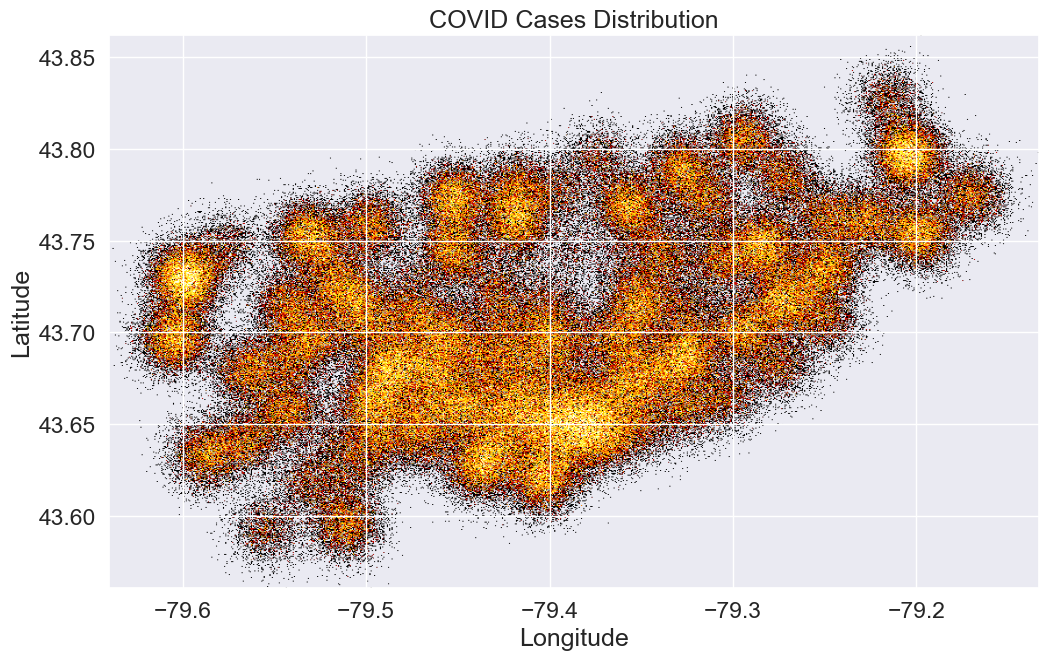

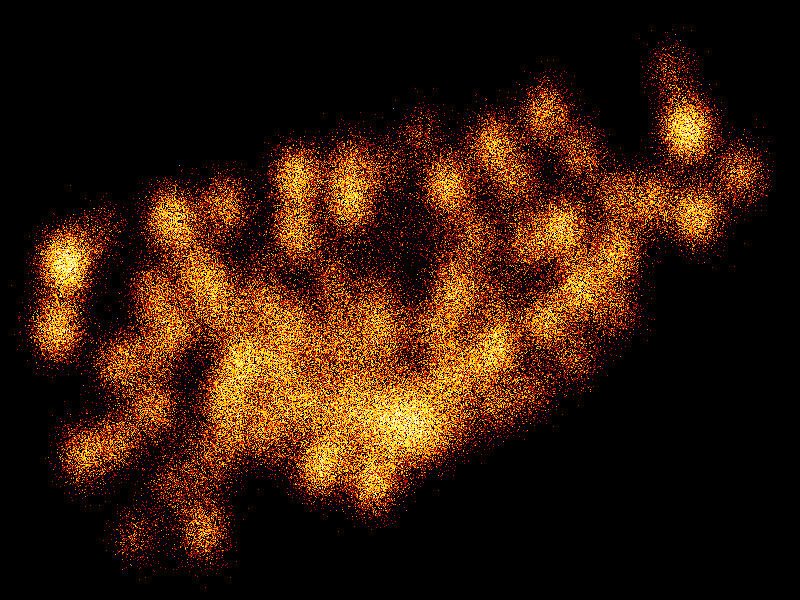

In [8]:
jitter_amount = 0.01  # adjust as needed
cord_merged['Latitude_jittered'] = cord_merged['Latitude'] + np.random.normal(-jitter_amount, jitter_amount, size=len(cord_merged))
cord_merged['Longitude_jittered'] = cord_merged['Longitude'] + np.random.normal(-jitter_amount, jitter_amount, size=len(cord_merged))

import datashader as ds
from datashader import transfer_functions as tf
import colorcet

# create canvas
cvs = ds.Canvas(plot_width=800, plot_height=600)

# aggregate data
agg = cvs.points(cord_merged, 'Longitude_jittered', 'Latitude_jittered')
print(agg) #check the aggregation

# color mapping
img = tf.shade(agg, cmap=colorcet.fire, )

# display basic graph by lat/long coordinates
plt.figure(figsize=(12, 8))
plt.imshow(img.to_pil(), extent=[cord_merged['Longitude_jittered'].min(), cord_merged['Longitude_jittered'].max(), cord_merged['Latitude_jittered'].min(), cord_merged['Latitude_jittered'].max()])
plt.title('COVID Cases Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

ds.utils.export_image(img = img,filename = 'datashader_all',fmt = ".png",background = 'black')

In [9]:
# simplify the dataframe:

df = cord_merged[['Reported Date','Outcome','Latitude_jittered', 'Longitude_jittered']]
df


Reported Date   Outcome  Latitude_jittered  Longitude_jittered
113463    2020-01-23  RESOLVED          43.768533          -79.428513
113464    2020-01-23  RESOLVED          43.770570          -79.426921
108244    2020-02-04  RESOLVED          43.766141          -79.390266
128492    2020-02-21  RESOLVED          43.753471          -79.343750
220581    2020-02-25  RESOLVED          43.672129          -79.367918
...              ...       ...                ...                 ...
222261    2024-01-16    ACTIVE          43.672642          -79.383738
217419    2024-01-16    ACTIVE          43.698865          -79.400031
285582    2024-01-16    ACTIVE          43.692811          -79.480780
295363    2024-01-16    ACTIVE          43.669932          -79.440172
200892    2024-01-16    ACTIVE          43.653995          -79.342898

[404884 rows x 4 columns]

In [ ]:
#go month by month and plot the lat/long distribution of the cases depending on outcome (this takes a while for the full dataset)

from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from PIL import Image

# set lat/long limits
x_range = (df['Longitude_jittered'].min(), df['Longitude_jittered'].max())
y_range = (df['Latitude_jittered'].min(), df['Latitude_jittered'].max())

# set bottom right corner coordinates for drawing the month
x_ub = x_range[1]
y_ub = y_range[0]

# sort dataframe by 'Reported Date'
df = df.copy()
df.sort_values('Reported Date', inplace=True)

# create an output directory for saving frames
output_dir = 'output_frames1'  # change this name!
os.makedirs(output_dir, exist_ok=True)

# initialize figure and axis outside the loop so that points accumulate over time
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_facecolor('k')  # set background color to black

# initialize text object for the date
date_text = ax.text(x_ub - 0.01, y_ub + 0.01, '', fontsize=20, color='w', ha='right', va='bottom') #this keeps it from being overwritten with each loop

# loop over all months and years
for year in range(2020, 2025):  # Change the range as needed
    # loop over all months for the given year
    for month in range(1, 13):
        # convert month to index between 0 and 1 for colormap
        color_idx = (month - 1) / 12.0

        # get lat/long of all cases in a given month
        lats = df[(
            (df['Reported Date'].dt.year == year) &
            (df['Reported Date'].dt.month == month))]['Latitude_jittered']
        lons = df[(
            (df['Reported Date'].dt.year == year) &
            (df['Reported Date'].dt.month == month))]['Longitude_jittered']

        outcomes = df[(
            (df['Reported Date'].dt.year == year) &
            (df['Reported Date'].dt.month == month))]['Outcome']

        # for timing/debugging: print unique outcomes
        unique_outcomes = outcomes.unique()
        print(f'Unique outcomes for {year}-{month:02d}: {unique_outcomes}')

        # for timing/debugging: print total number of cases for each month
        total_cases = len(lats)
        print(f'Total cases in {year}-{month:02d}: {total_cases}')

        # update the date text
        date_text.set_text(f'{year}-{month:02d}') #this prints the date for each interation of loop

        # plot latitude and longitude
        for lat, lon, outcome in zip(lats, lons, outcomes):
            if outcome == 'RESOLVED':
                ax.scatter(lon, lat, s=0.15, linewidth=0, facecolor='xkcd:lightblue', marker=',', alpha=0.7)
            elif outcome == 'FATAL':
                ax.scatter(lon, lat, s=1.5, linewidth=0, facecolor='xkcd:gold', marker=',')
            else:
                ax.scatter(lon, lat, s=0.15, linewidth=0, facecolor='xkcd:lavender', marker=',', alpha=0.5)

        # set lat/long limits
        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        ax.axis('off')

        # save figure for each month
        plt.savefig(os.path.join(output_dir, f'{year}-{month:02d}.png'), dpi=200)

# close the figure outside the loop after all months are plotted
plt.close()


Unique outcomes for 2020-01: ['RESOLVED']
Total cases in 2020-01: 2
Unique outcomes for 2020-02: ['RESOLVED']
Total cases in 2020-02: 7
Unique outcomes for 2020-03: ['RESOLVED' 'FATAL']
Total cases in 2020-03: 961
Unique outcomes for 2020-04: ['RESOLVED' 'FATAL']
Total cases in 2020-04: 5389
Unique outcomes for 2020-05: ['RESOLVED' 'FATAL']
Total cases in 2020-05: 4983
Unique outcomes for 2020-06: ['RESOLVED' 'FATAL']
Total cases in 2020-06: 2651
Unique outcomes for 2020-07: ['RESOLVED' 'FATAL']
Total cases in 2020-07: 993
Unique outcomes for 2020-08: ['RESOLVED' 'FATAL']
Total cases in 2020-08: 760
Unique outcomes for 2020-09: ['RESOLVED' 'FATAL']
Total cases in 2020-09: 3793
Unique outcomes for 2020-10: ['RESOLVED' 'FATAL']
Total cases in 2020-10: 8953
Unique outcomes for 2020-11: ['RESOLVED' 'FATAL']
Total cases in 2020-11: 13690
Unique outcomes for 2020-12: ['RESOLVED' 'FATAL']
Total cases in 2020-12: 19609
Unique outcomes for 2021-01: ['RESOLVED' 'FATAL']
Total cases in 2021-01: 2

In [10]:
!magick -delay 20 -loop 0 output_frames1/*.png output_animation1.gif #use imagemagick to create a gif of those saved frames, can run from command line

magick: unable to open image 'output_animation1.gif': No such file or directory @ error/blob.c/OpenBlob/3571.
